Профильное задание.Вопрос 4.
Данные о 4 компаниях: Red, Black, Green и Blue.
По компаниям предоставлены следующие данные:

`Hid` – human_id, зашифрованный персональный идентификатор пользователя
компаний

`has_company_id` – наличие зарегистрированного аккаунта в компании

`company_gmv_total` – суммарный gmv пользователя в сервисе

`company_gvm_order_count` – количество успешных заказов пользователя в сервисе

`company_activity_count` – количество активных действий пользователя в сервисе

`company_android` – установленное у пользователя приложение компании на
платформе android

`company_apple` – установленное у пользователя приложение компании на
платформе Apple

`company _web` - установленное у пользователя приложение компании на ПК

`is_msk` – территориальное расположение в Москве

Задание: Какие выводы вы можете сделать на основании этих данных?
Результат решения: предоставить в виде файла Jupyter Notebook (ipynb) c
визуализацией и комментариями. Прислать ссылку на файл.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [67]:
df = pd.read_excel('../vk/Analytic_test.xlsx', header=1).drop('Unnamed: 0', axis=1)
# загрузим датасет и удалим лишний столбик с порядковыми номерами,

In [68]:
df.head()
# удалим столбик с лишними данными

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

Заметим что в датафрейме:
- одного значения в столбике Blue_gmv_total не хватает,
- также данные о количестве активных действий пользователя в сервисе есть только у фирмы Blue,
- данные о количестве успешных заказов пользователя в сервисе только у Green и Black,
- данные о суммарном gmv пользователя в сервисе у Red компании отсутствуют
- тип данных в столбцах Blue_activity_count, Green_gvm_order_count и Black_gvm_order_count следует поменять с object на float;
- имеется странный столбик, отсутствующий в описании: 'active_Red', можно предположить, что это количество активных действий пользователя в сервисе Red, но тогда там клиентами Red было совершено ооочень мало активных действий, по сравнению с Blue. Да и вообще про компанию Red очень мало данных

In [72]:
# проверим уникальные значения
df.Blue_activity_count.unique()

array(['2.0', '0.0', '1.0', '17.0', '13.0', '5.0', '6.0', '26.0', '8.0',
       '4.0', '27.0', '19.0', '12.0', '9.0', '3.0', '20.0', '10.0',
       '23.0', '7.0', '16.0', '14.0', '15.0', '53.0',
       datetime.datetime(2019, 5, 4, 0, 0), '32.0', '11.0', '18.0',
       '24.0', '119.0', '49.0', '39.0', '21.0',
       datetime.datetime(2019, 5, 7, 0, 0), '35.0', '72.0', '30.0',
       '71.0', '28.0', '42.0', '34.0', '41.0', '22.0', '29.0', '36.0',
       '90.0', '40.0', '43.0', datetime.datetime(2019, 5, 1, 0, 0),
       '51.0', '44.0', '25.0', '31.0', '45.0', '67.0', '33.0', '101.0',
       '74.0', '46.0', '111.0', '66.0', '38.0', '63.0', '100.0', '237.0',
       '59.0', datetime.datetime(2019, 5, 3, 0, 0),
       datetime.datetime(2019, 5, 6, 0, 0), '37.0', '47.0'], dtype=object)

Странно, но среди значений имеются данные в формате даты, поэтому у меня не получается изменить тип данных на float.
та же история у столбиков 'Green_gvm_order_count',  'Black_gvm_order_count'

In [73]:
# посчитаем количество уникальных значений в каждом столбце
df.nunique()

HID                      100000
active_Red                    2
has_Green_id                  3
has_Black_id                  3
has_Blue_id                   5
Blue_activity_count          69
Blue_gmv_total              243
Green_gvm_total             683
Green_gvm_order_count        71
Black_gvm_total             913
Black_gvm_order_count        39
Red_android                   2
Green_android                 2
Black_android                 2
Blue_android                  2
Red_apple                     2
Green_apple                   2
Black_apple                   2
Blue_apple                    2
is_msk                        2
Red_web                       2
Green_web                     2
Black_web                     2
Blue_web                      2
dtype: int64

Все пользователи уникальны

In [75]:
# проверим количество пропущенных значений
df.isna().sum()

HID                      0
active_Red               0
has_Green_id             0
has_Black_id             0
has_Blue_id              0
Blue_activity_count      0
Blue_gmv_total           1
Green_gvm_total          0
Green_gvm_order_count    0
Black_gvm_total          0
Black_gvm_order_count    0
Red_android              0
Green_android            0
Black_android            0
Blue_android             0
Red_apple                0
Green_apple              0
Black_apple              0
Blue_apple               0
is_msk                   0
Red_web                  0
Green_web                0
Black_web                0
Blue_web                 0
dtype: int64

Рассчитаем количество зарегистрированных аккаунтов

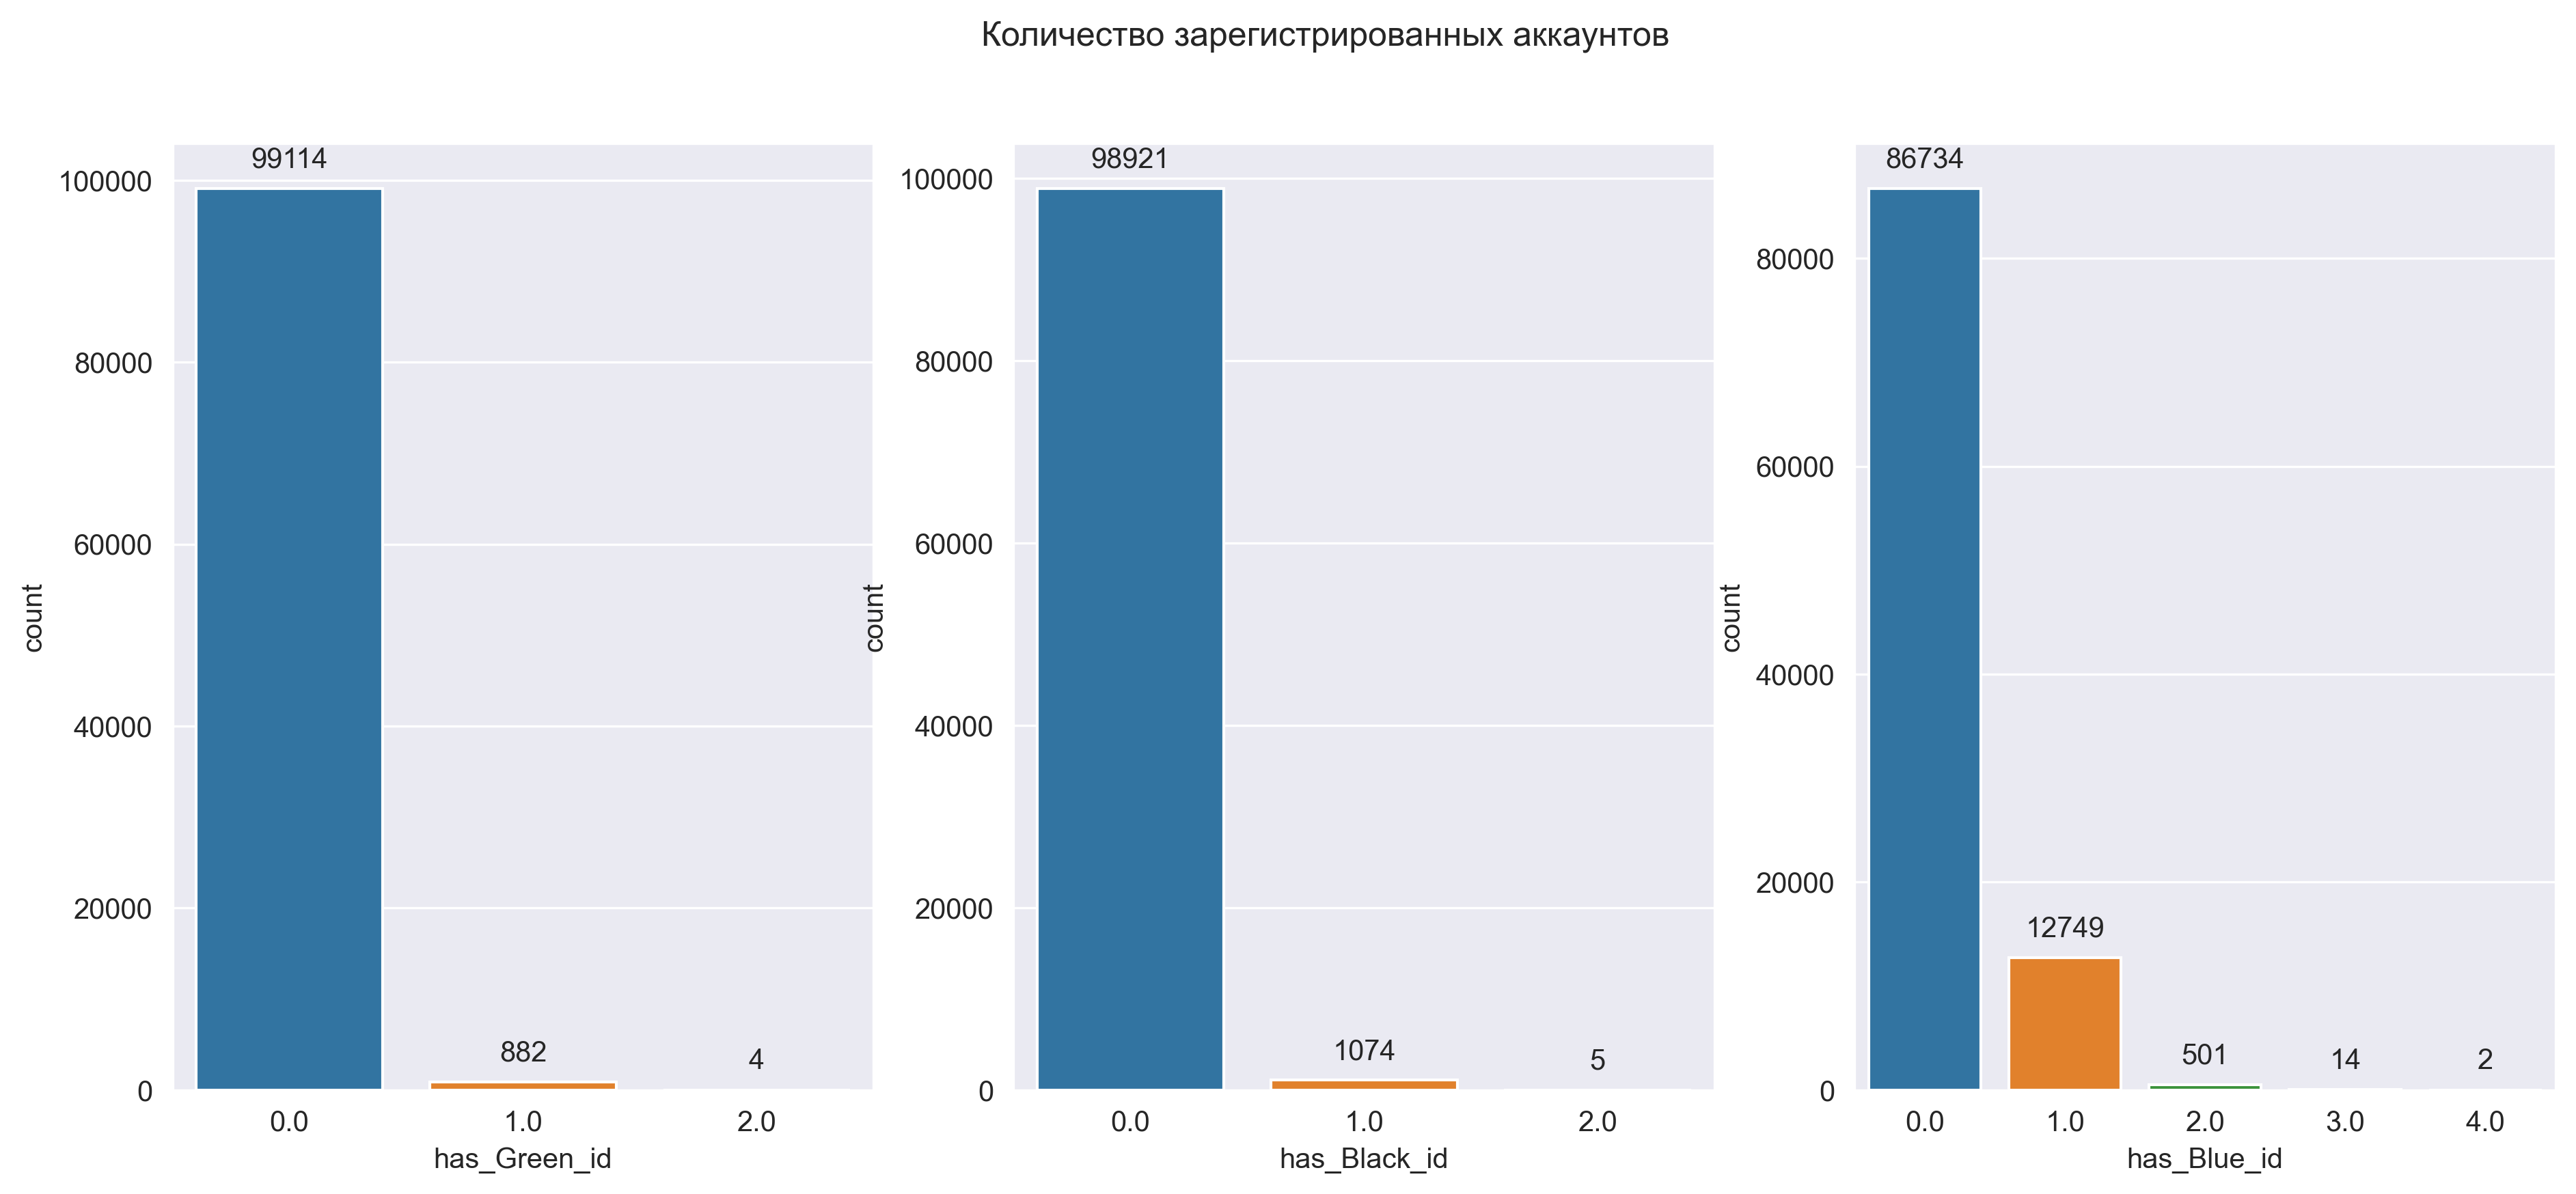

In [83]:
sns.set_style("darkgrid")
column_list = ['has_Green_id','has_Black_id','has_Blue_id']

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 6) 
fig.set_dpi(300)
for variable, subplot in zip(column_list, ax.flatten()):
    splot = sns.countplot(df[variable], ax=subplot)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
fig.suptitle("Количество зарегистрированных аккаунтов");

Судя по каунтплотам пользователи в данных компаниях практически не регистрируются, значит она необязательная. Такое возможно, например, на новостном сайте, где для использования сервиса регистрация не нужна, но если у пользователя есть желание подписаться на определенные источники с получением уведомлений, то создание профиля необходимо.
Компания с наибольшим количеством зарегистрированных пользователей - Blue.
При этом в компании Blue у клиентов зарегистрировано по несколько аккаунтов, возможно это боты.

Посмотрим сколько пользователей зарегистрированы в каждом типе приложения

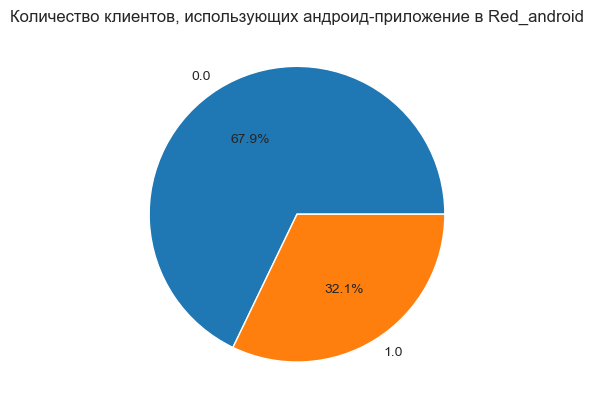

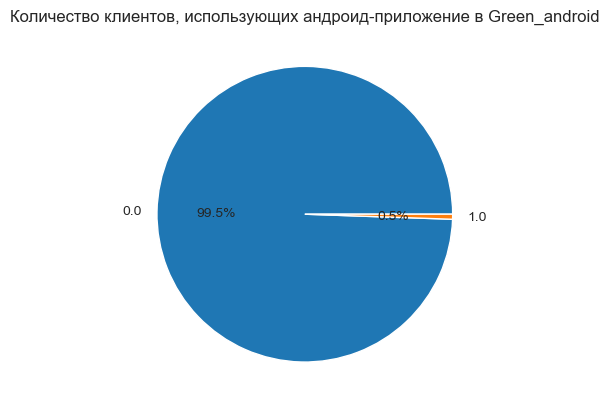

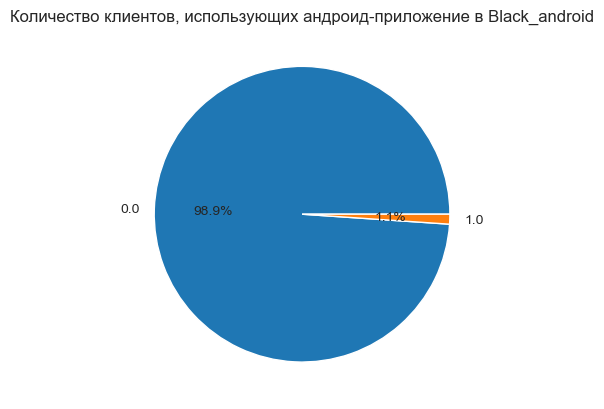

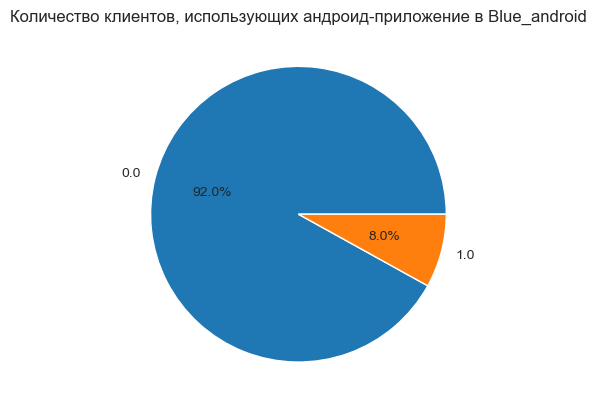

In [77]:
for column in ['Red_android', 'Green_android', 'Black_android', 'Blue_android']:
    df1 = df.groupby(column).agg({'HID': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df1['HID'], labels=df1.index, autopct='%1.1f%%')
    ax1.set_title(f'Количество клиентов, использующих андроид-приложение в {column}')
    plt.show()

Больше всего андроид-приложение установили клиенты Red, Blue, в остальных компаниях можно сказать не пользуются.
Посмотрим на распределение клиентов с apple-приложением

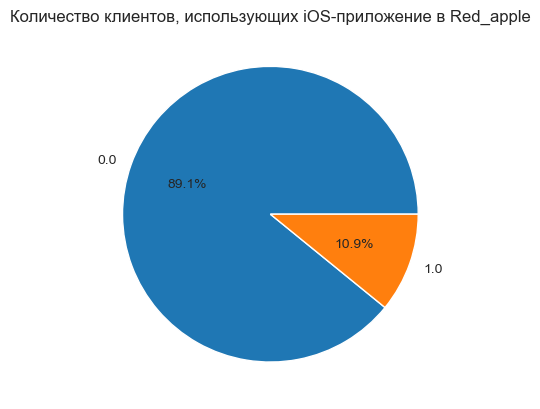

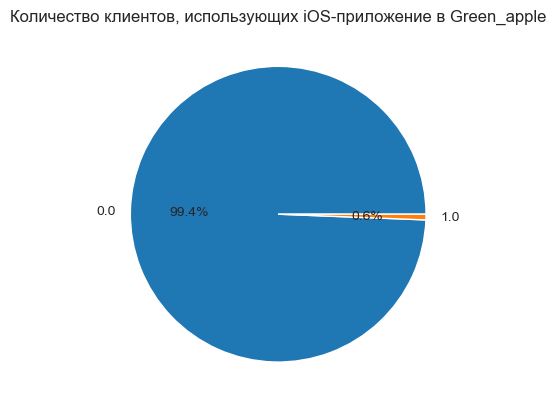

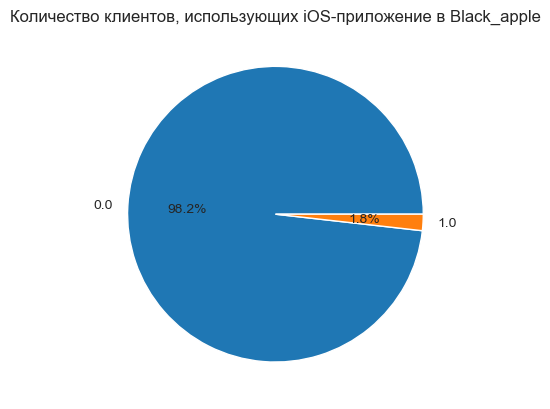

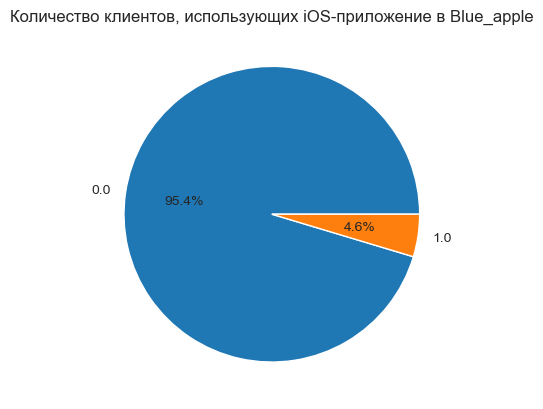

In [78]:
for column in ['Red_apple', 'Green_apple', 'Black_apple', 'Blue_apple']:
    df1 = df.groupby(column).agg({'HID': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df1['HID'], labels=df1.index, autopct='%1.1f%%')
    ax1.set_title(f'Количество клиентов, использующих iOS-приложение в {column}')
    plt.show()

Та же ситуция и с пользователями apple-версией: Больше всего приложение установили клиенты Red, Blue, в остальных компаниях очень мизерное количество. Но пользователей андроид-приложением гораздо больше, чем айфонским приложением/
Проверим, какая доля клиентов компаний установили программу на компьютер

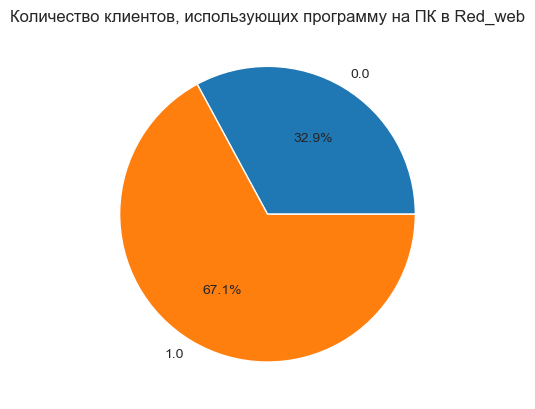

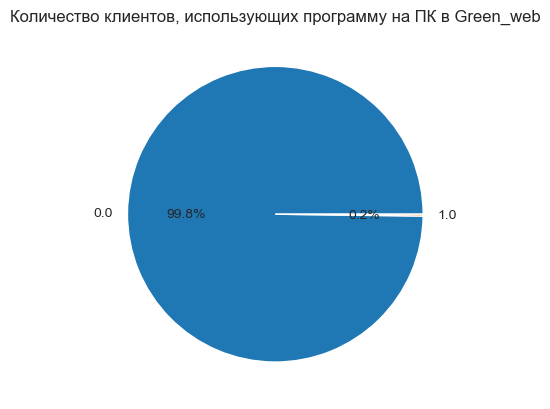

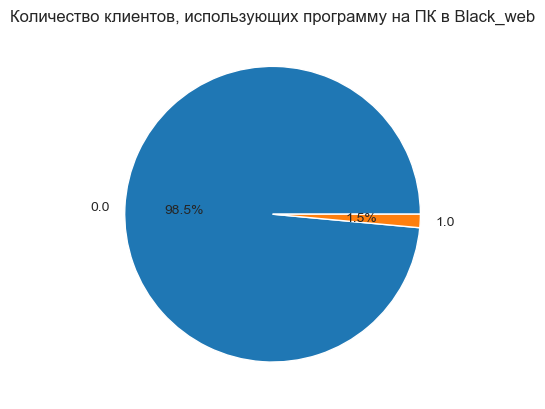

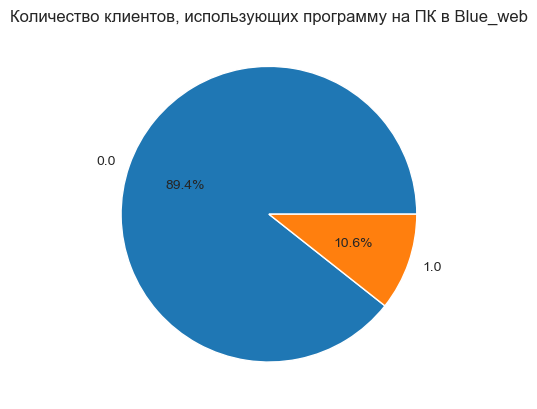

In [79]:
for column in ['Red_web', 'Green_web', 'Black_web', 'Blue_web']:
    df1 = df.groupby(column).agg({'HID': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(df1['HID'], labels=df1.index, autopct='%1.1f%%')
    ax1.set_title(f'Количество клиентов, использующих программу на ПК в {column}')
    plt.show()

Мы наблюдаем прекрасную картину у пользователей веб-версией компании Red: 67.1% пользователей от общего числа клиентов установили веб-версию.

Посчитаем суммарную прибыль, полученную компаниями, из имеющихся данных (компаний Blue и Green)

In [80]:
df.Blue_gmv_total.sum()

246114.0

In [81]:
df.Green_gvm_total.sum()

5993420.0

In [82]:
# посмотрим какой процент ото всех пользователей находятся в Москве
round(df.is_msk.value_counts(normalize=True)*100, 1)

0.0    88.1
1.0    11.9
Name: is_msk, dtype: float64

Большинство клиентов не из Москвы

## Выводы
Датасет наполнен "грязными данными": столбцы не приведены к нужным типам данных и среди значений имеются типы,отличные от типов других значений в этом же столбце.
Большинство пользователей не имеют зарегистрированного аккаунта у компании, возможно это сервисы новостей или блоги.
Компания с наибольшим количеством зарегистрированных пользователей - Blue. При этом в компании Blue у клиентов c одним HID зарегистрировано по несколько аккаунтов, возможно это боты.
Большинство пользователей всех компаний не из Москвы
Среди всех установленных ПО лидируют приложения на ПК (67% пользователей Red). Среди инсталлированных Андроид- и iOS-приложений также лидирует пользователи Red, жалко что нет данных об их прибыли для суммарного расчет gmv.
А так, из имеющихся данных больше всего прибыли у компании Green, хотя количество зарегистрированных пользователей, как и установленных ПО у нее меньше всего, откуда выручка непонятно.

Спасибо за внимание :)